In [2]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Charger les données
file_path = r"C:\Users\DOUMBIA\Desktop\Projet\archive (11)\gold_price_data.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes
print(df.head())


         Date  Value
0  1970-01-01   35.2
1  1970-04-01   35.1
2  1970-07-01   35.4
3  1970-10-01   36.2
4  1971-01-01   37.4


In [4]:
# Vérifier les types de données et les valeurs manquantes
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB
None
Date     0
Value    0
dtype: int64


In [5]:
# Renommage de la colonne 
df.rename(columns={'Value':'valeur_or'},inplace=True)
df

,Date,valeur_or
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [6]:
# Conversion de la date en datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df

C:\Users\DOUMBIA\AppData\Local\Temp\ipykernel_7856\2410815283.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)


,Date,valeur_or
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10787 non-null  datetime64[ns]
 1   valeur_or  10787 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.7 KB


In [8]:
# Mettre la date en index de la table
df.set_index('Date',inplace=True)
df

,valeur_or
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


# Identification du modéle 

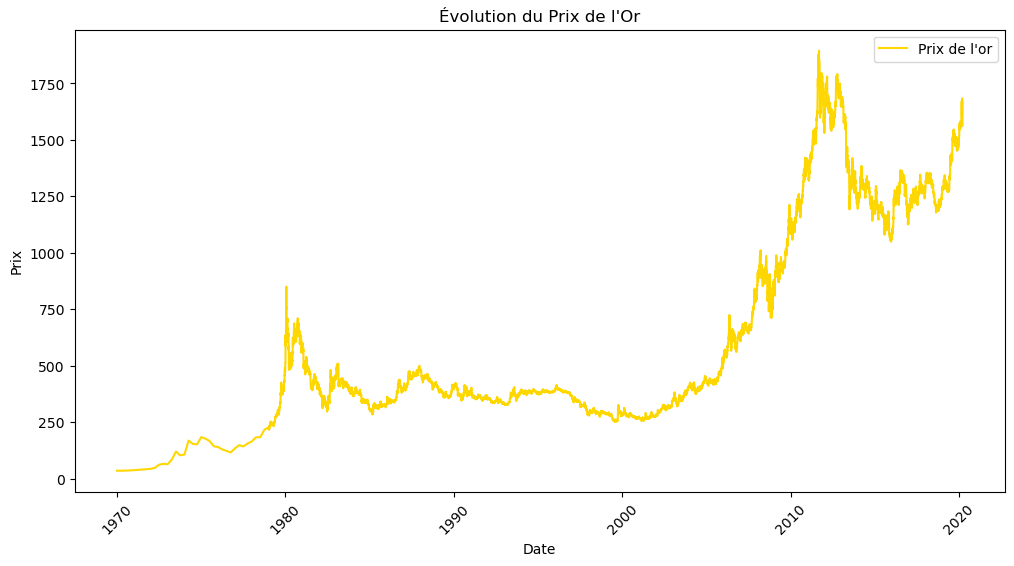

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['valeur_or'], label="Prix de l'or", color='gold')
plt.xlabel("Date")
plt.ylabel("Prix")
plt.title("Évolution du Prix de l'Or")
plt.legend()
plt.xticks(rotation=45)
plt.show()


ACF,PACF

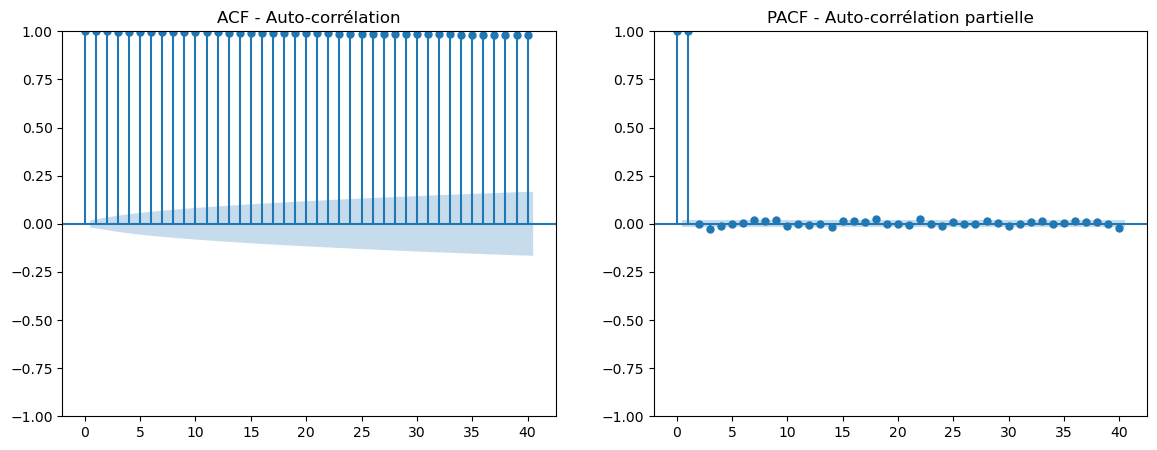

In [10]:
# 2️⃣ Tracer l'ACF et le PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sm.graphics.tsa.plot_acf(df['valeur_or'], lags=40, ax=ax[0])
ax[0].set_title("ACF - Auto-corrélation")

sm.graphics.tsa.plot_pacf(df['valeur_or'], lags=40, ax=ax[1])
ax[1].set_title("PACF - Auto-corrélation partielle")

plt.show()

In [11]:
# 3️⃣ Test de Dickey-Fuller Augmenté (ADF)
result = adfuller(df['valeur_or'])
print("Statistique de test ADF:", result[0])
print("P-value:", result[1])
print("Valeurs critiques:", result[4])

if result[1] <= 0.05:
    print("✅ La série est stationnaire (p-value ≤ 0.05)")
else:
    print("❌ La série n'est PAS stationnaire (p-value > 0.05)")

Statistique de test ADF: -0.07112124453813352
P-value: 0.9522400769147396
Valeurs critiques: {'1%': -3.4309586221840513, '5%': -2.861808976860248, '10%': -2.566913171245489}
❌ La série n'est PAS stationnaire (p-value > 0.05)


# Décomposition de la série :

On va utiliser la décomposition additive car les prix de l'or sont souvent influencés par des tendances macroéconomiques.

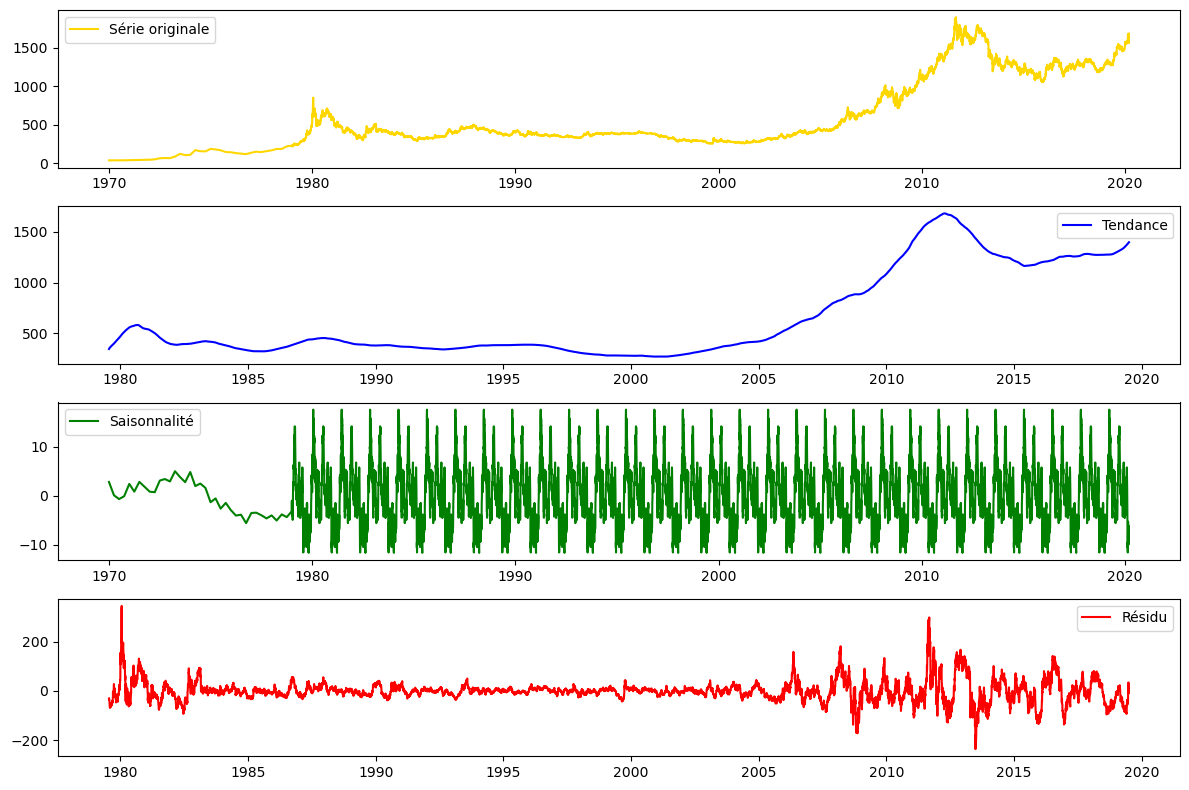

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposition
decomposed = seasonal_decompose(df['valeur_or'], model='additive', period=365)  # Période estimée sur 1 an

# Tracé des composantes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['valeur_or'], label="Série originale", color='gold')
plt.legend()

plt.subplot(412)
plt.plot(decomposed.trend, label="Tendance", color='blue')
plt.legend()

plt.subplot(413)
plt.plot(decomposed.seasonal, label="Saisonnalité", color='green')
plt.legend()

plt.subplot(414)
plt.plot(decomposed.resid, label="Résidu", color='red')
plt.legend()

plt.tight_layout()
plt.show()


# Stationnarité

In [13]:
df['valeur_or_diff1'] = df['valeur_or'].diff().dropna()

# Nouveau test ADF après différenciation
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['valeur_or_diff1'].dropna())
print(f"Statistique de test ADF: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print(f"Valeurs critiques: {adf_test[4]}")


Statistique de test ADF: -17.568807521617416
P-value: 4.06137436044665e-30
Valeurs critiques: {'1%': -3.4309586221840513, '5%': -2.861808976860248, '10%': -2.566913171245489}


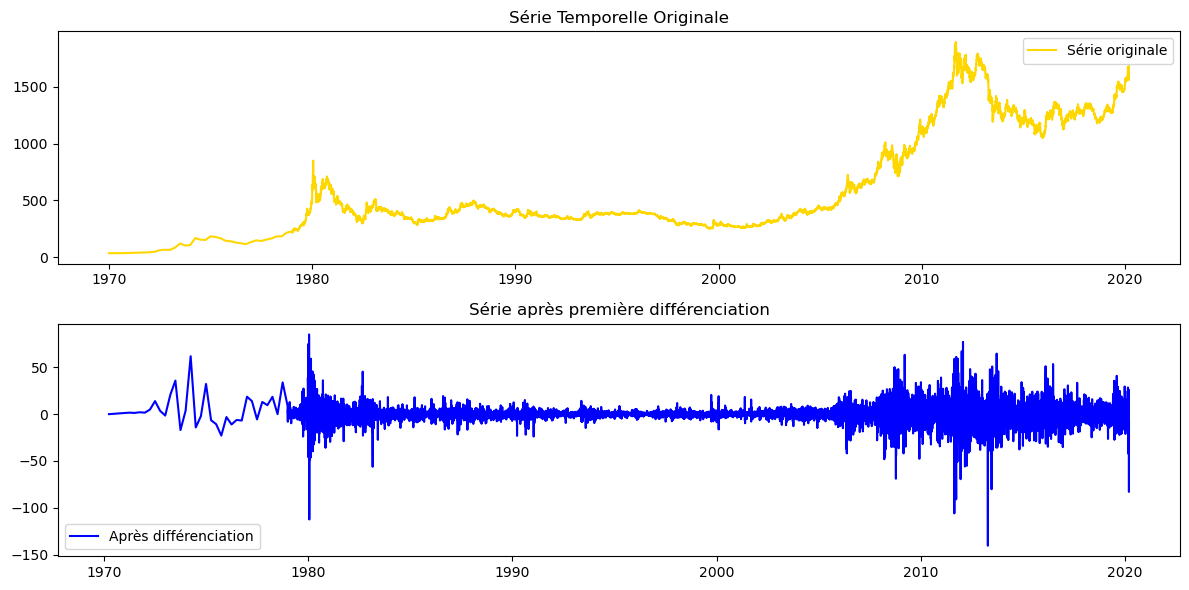

In [14]:
plt.figure(figsize=(12,6))

# Série originale
plt.subplot(2,1,1)
plt.plot(df['valeur_or'], color='gold', label="Série originale")
plt.title("Série Temporelle Originale")
plt.legend()

# Série après différenciation
plt.subplot(2,1,2)
plt.plot(df['valeur_or_diff1'], color='blue', label="Après différenciation")
plt.title("Série après première différenciation")
plt.legend()

plt.tight_layout()
plt.show()


# Recherhons les P et q 

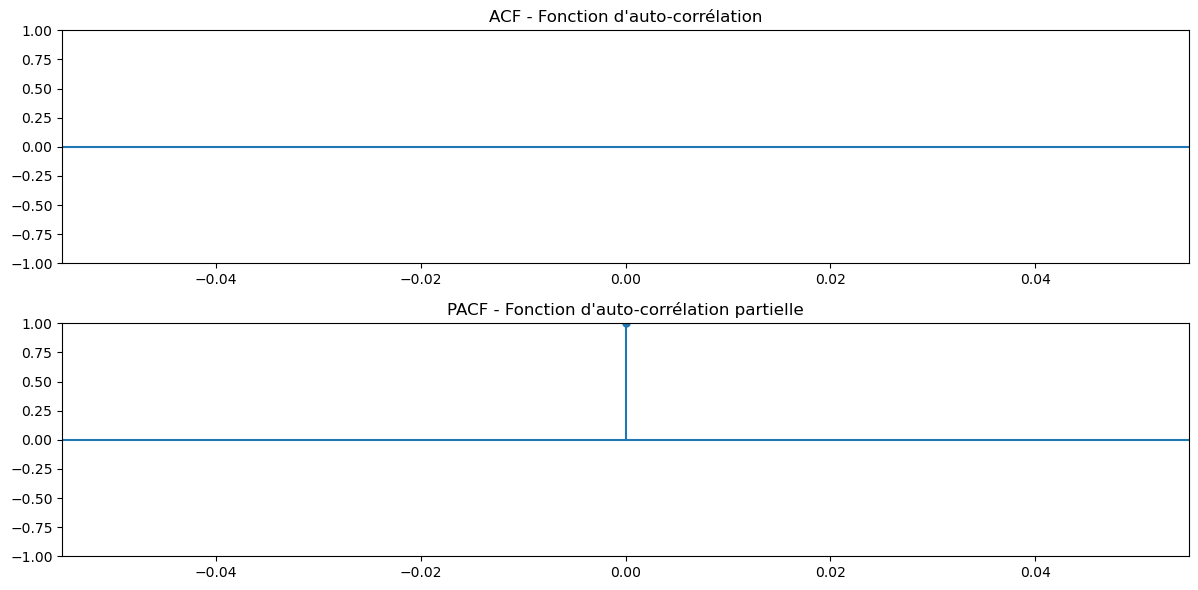

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF et PACF
plt.figure(figsize=(12,6))

# ACF
plt.subplot(2,1,1)
plot_acf(df['valeur_or_diff1'], lags=50, ax=plt.gca())
plt.title('ACF - Fonction d\'auto-corrélation')

# PACF
plt.subplot(2,1,2)
plot_pacf(df['valeur_or_diff1'], lags=50, ax=plt.gca())
plt.title('PACF - Fonction d\'auto-corrélation partielle')

plt.tight_layout()
plt.show()


# Conclusion :

D'après ce que nous avons observé, le modèle ARIMA le plus probable serait ARIMA(1, 1, 0) :

p = 1 (d'après le PACF avec un seul pic).
       
d = 1 (d'après la stationnarité testée avec l'ADF).
       
q = 0 (pas de composante de moyenne mobile d'ordre élevé d'après l'ACF). Cela signifie que la série temporelle peut être modélisée par un processus auto-régresif d'ordre 1,

sans composante MA, et avec une différenciation d'ordre 1 pour rendre la série stationnaire. 

# Entrainement et evaluation des modéles

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Étape 1: Diviser les données en ensembles d'entraînement et de test
train_size = int(len(df) * 0.8)  # Utiliser 80% des données pour l'entraînement
train, test = df['valeur_or'][:train_size], df['valeur_or'][train_size:]

# Étape 2: Entraîner le modèle ARIMA(1, 1, 0)
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()

C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              valeur_or   No. Observations:                 8629
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -29989.718
Date:                Wed, 19 Feb 2025   AIC                          59983.436
Time:                        11:20:42   BIC                          59997.562
Sample:                             0   HQIC                         59988.253
                               - 8629                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0204      0.004     -5.340      0.000      -0.028      -0.013
sigma2        61.1875      0.246    249.149      0.000      60.706      61.669
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [18]:
# Étape 3: Faire les prédictions
forecast = model_fit.forecast(steps=len(test))

# Étape 4: Calculer l'erreur quadratique moyenne (MSE) pour évaluer la précision
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")


C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 163488.51932362167


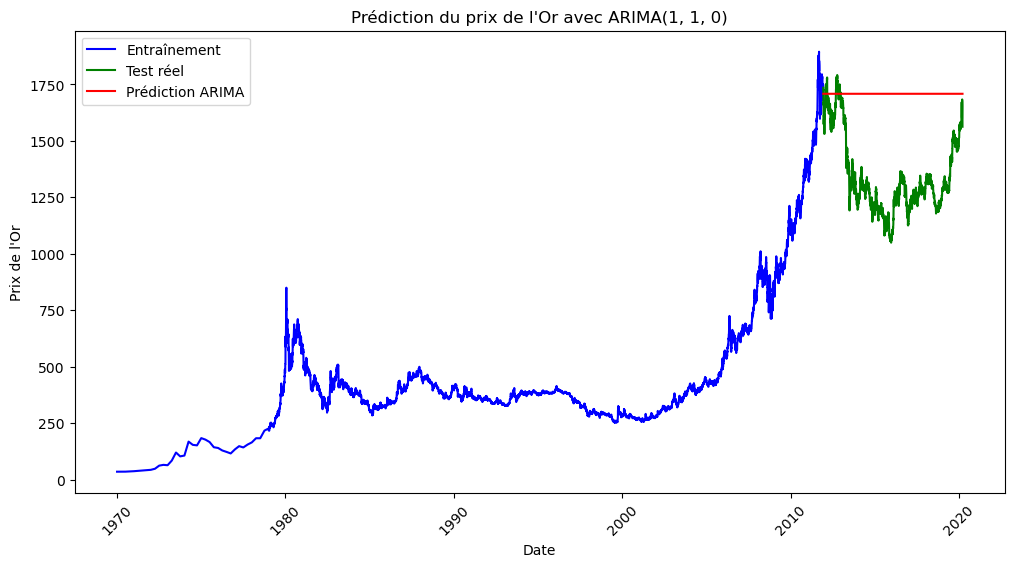

In [19]:
# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entraînement', color='blue')
plt.plot(test.index, test, label='Test réel', color='green')
plt.plot(test.index, forecast, label='Prédiction ARIMA', color='red')
plt.xlabel("Date")
plt.ylabel("Prix de l'Or")
plt.title("Prédiction du prix de l'Or avec ARIMA(1, 1, 0)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Interprétation des résultats :

Coefficients du modèle :

AR(1) (Autoregressive lag 1) : Le coefficient est de -0.0204, avec une valeur p très petite (p < 0.05). Cela signifie que la première valeur retardée de la série a une influence négative et statistiquement significative sur la valeur actuelle. L'effet est faible, mais il est significatif.
sigma2 : Le paramètre de variance du modèle ARIMA est estimé à 61.1875, avec un écart-type de 0.246. Cela donne une idée de la variabilité des erreurs du modèle.
Critères d'information :

AIC (Akaike Information Criterion) : 59,983.436. Un score AIC plus faible signifie que le modèle s'adapte mieux aux données, tout en pénalisant la complexité.
BIC (Bayesian Information Criterion) : 59,997.562. Semblable à l'AIC, mais avec une pénalité plus forte pour les modèles complexes.
HQIC (Hannan-Quinn Information Criterion) : 59,988.253. Il est également un critère de sélection de modèle.
Tests statistiques :

Ljung-Box (Q) : Le test de Ljung-Box teste l'absence d'autocorrélation dans les résidus du modèle. Ici, la statistique Q = 0.01 et p = 0.93, ce qui signifie qu'il n'y a pas d'autocorrélation significative dans les résidus, suggérant que le modèle a bien capturé la dynamique des données.
Jarque-Bera (JB) : Ce test teste la normalité des résidus. La statistique JB = 260182.74 et la p-value < 0.05 indiquent que les résidus ne suivent pas une distribution normale. Cela peut être dû à des valeurs extrêmes ou à une asymétrie dans les données.
Heteroskedasticity (H) : Le test de l'hétéroscédasticité donne une statistique H = 1.57 avec une p-value < 0.05, ce qui suggère la présence d'hétéroscédasticité dans les résidus, c'est-à-dire que la variance des erreurs n'est pas constante.
Skewness et Kurtosis :

Skewness : -0.48, ce qui indique que la distribution des erreurs est légèrement négative (les erreurs ont une tendance à être plus faibles que ce que l'on attend).
Kurtosis : 29.89, ce qui est extrêmement élevé et suggère que les erreurs ont une distribution très pointue avec beaucoup de valeurs extrêmes.
Conclusion :
Le modèle ARIMA(1, 1, 0) semble capturer les dynamiques de base des données, bien que des problèmes de normalité et d'hétéroscédasticité des résidus soient présents.
Les résultats suggèrent que le modèle peut nécessiter une amélioration, notamment en raison des violations des hypothèses de normalité et d'homoscédasticité.

# Méthode automatique

recherchons les p,d,q automatiquement

In [20]:
import pmdarima as pm
from pmdarima import auto_arima

# Appliquer auto_arima sur la série temporelle
model_auto = auto_arima(df['valeur_or'], seasonal=False, stepwise=True, trace=True)

# Afficher le résumé du modèle
print(model_auto.summary())


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78048.396, Time=23.40 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78090.196, Time=0.43 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78090.620, Time=0.99 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78090.554, Time=1.34 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78090.847, Time=0.36 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78081.191, Time=11.00 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78081.126, Time=10.19 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78049.951, Time=26.03 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78084.745, Time=15.85 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78088.281, Time=8.35 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78082.704, Time=13.71 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78082.775, Time=11.20 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78086.029, Time=33.56 sec


C:\python\environement python\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=78049.141, Time=8.31 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 164.897 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10787
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -39018.198
Date:                Wed, 19 Feb 2025   AIC                          78048.396
Time:                        11:23:32   BIC                          78092.112
Sample:                             0   HQIC                         78063.138
                              - 10787                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3740      0.229      1.634      0.102      -0.0

# Paramètres du modèle :

AR(1) et AR(2) (Auto-régressif) ont des coefficients respectivement de -0.7037 et -0.9374, ce qui indique une forte influence des valeurs passées de la série temporelle.
MA(1) et MA(2) (Moyenne mobile) ont des coefficients respectivement de 0.6845 et 0.9173, ce qui montre que l'impact des erreurs passées est également significatif.
Interception : Le coefficient de l'interception est de 0.374, mais il n'est pas statistiquement significatif (p-value > 0.05).

Critères d'information :

AIC (Akaike Information Criterion) : 78048.396
BIC (Bayesian Information Criterion) : 78092.112
HQIC (Hannan-Quinn Information Criterion) : 78063.138 Un AIC plus bas indique un meilleur modèle, donc le modèle ARIMA(2, 1, 2) avec ces paramètres est relativement performant par rapport à d'autres modèles testés.

Tests de diagnostic :

Ljung-Box (L1) : Le test de Ljung-Box a une p-value de 0.36, ce qui indique qu'il n'y a pas de dépendance significative entre les résidus du modèle, et que les résidus sont indépendants (pas de problème de spécification du modèle).
Jarque-Bera (JB) : Le test de Jarque-Bera est significatif avec une p-value de 0.00, ce qui suggère que les résidus ne suivent pas une distribution normale. Cela peut signifier que les erreurs du modèle ne sont pas entièrement capturées par le modèle.
Hétéroscédasticité : Le test de hétéroscédasticité montre une p-value très faible (0.00), indiquant une variabilité non constante dans les erreurs.

Conclusions :

Le modèle ARIMA(2, 1, 2) semble bien capturer la structure de la série temporelle, bien que l'hypothèse de normalité des résidus ne soit pas entièrement validée.
L'absence de dépendance dans les résidus est un bon signe pour la spécification du modèle.

C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\python\environement python\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

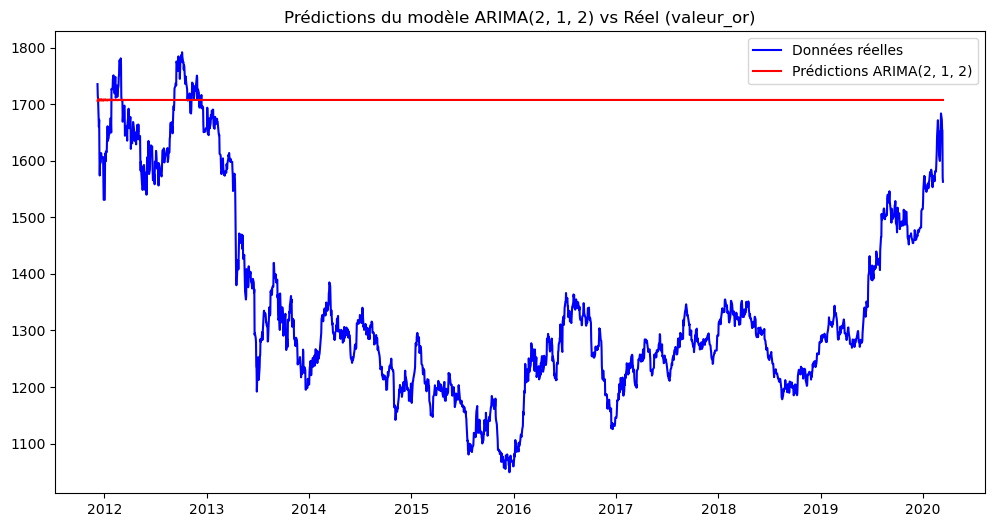

In [21]:
# Sélectionner uniquement la colonne 'valeur_or' pour entraîner le modèle
df_valeur_or = df['valeur_or']

# Séparer les données en train et test
train_size = int(len(df_valeur_or) * 0.8)
train, test = df_valeur_or[:train_size], df_valeur_or[train_size:]

# Entraîner le modèle ARIMA(2, 1, 2)
model_auto = ARIMA(train, order=(2, 1, 2))
model_auto_fit = model_auto.fit()

# Prédictions avec le modèle
forecast_auto = model_auto_fit.forecast(steps=len(test))

# Visualisation des résultats comparatifs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], test, label='Données réelles', color='blue')
plt.plot(df.index[train_size:], forecast_auto, label='Prédictions ARIMA(2, 1, 2)', color='red')
plt.legend()
plt.title("Prédictions du modèle ARIMA(2, 1, 2) vs Réel (valeur_or)")
plt.show()
